<a href="https://colab.research.google.com/github/IsaacNewtonVII/HDSC_StageD/blob/main/Stage_D_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries and loading the data

In [ ]:
#Importing needed libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras



In [ ]:
#Mnist is a dataset that comes with Keras by default, we simply load the test and train files as shown below

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


#Exploring the data

The mnist dataset is a collection of 28 x 28 pixel images showing hand-drawn representations of the digits 0-9, or what we will refer to as 10 classes. Every mnist datapoint has two parts: the image of a handwritten digit(x) and the corresponding label(y), Both the training set and the test set contains images and the corresponding labels.

In [ ]:
#Peaking the shape of the datasets

print("Training data: {}, {}".format(train_images.shape, train_labels.shape))
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))

Training data: (60000, 28, 28), (60000,)
Test data: (10000, 28, 28), (10000,)


In [ ]:
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))

There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Label: 5')

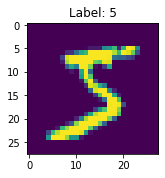

In [ ]:
#Visualizing the images

plt.figure(figsize=(8, 5))
#the subplot() function takes three arguments that describes the layout of the figure
#the figure below has 1 row, 3 columns, and this plot is the first plot as represented by the third argument(index of current plot)
plt.subplot(1,3,1)
#the imshow() function is used to display data as an image; i.e. on a 2D regular raster
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))

Text(0.5, 1.0, 'Label: 0')

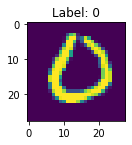

In [ ]:
plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))

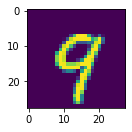

In [ ]:
plt.subplot(1,3,3)
plt.imshow(test_images[12])
plt.show()

## Data Processing

We will need to scale the images pixel values. Pixel values are often unsigned integers in the range between 0 and 255. Although these pixel values can be presented directly to neural networks in their raw format, this can result in challenges during modeling, such as in the slower than expected training of the model.

Instead, there can be great benefit in preparing the image pixel values prior to modeling, such as simply scaling pixel values to the range 0-1 , even standardizing the values and centering it

In [ ]:
#we normalize our dataset to range between 0 and 1. In this dataset , the pixel values range from 0 to 255.
#Dividing the data by 255 scale it to the required range. This is done to help with the training.

train_images = train_images / 255.0
test_images  = test_images / 255.0

The training data is further partitioned to create a validation set. We split the training data to training and validation sets.
In other words, a training set is used to fit the parameters, validation set is used to tune the parameters while the trained classifieris evaluated on the test set.

In [ ]:
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]

print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("y_train: {}".format(y_train.shape))
print("y_val: {}".format(y_val.shape))

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


Now we one-hot encode the categorical column(y in this case). 
In one-hot encoding, we convert the categorical data into a vector of numbers i.e converting class vectors to binary class vectors(0 and 1). This is done because machine learning algorithms cannot work with categorical data directly.

The one-hot encoding will be a row vector, and for each image, it will have a dimension of 1 x 10.
It's important to note that the vector consists of all zeros except for the class that it represents, there you'll find a 1. E.g 3 translates to [0 0 0 1 0 0 0 0 0 0] and 9 translates to [0 0 0 0 0 0 0 0 0 1]. Note that no_labels also refers to the number of classes which is 10

In [ ]:
# one-hot encoding using keras' numpy-related utilities

from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

As with all machine learning, the models are very picky about the format of the input data. We need to reshape the 28 x 28 image arrays into 784-unit vectors. This is necessary because the first layer of the network is expecting a vector input

In [ ]:
# Flattening/reshaping the images from the 2D 28 * 28 pixels array to 1D 784 single pixel array

new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)

print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("test_images: {}".format(test_images.shape))

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


We will now define two placeholders, an input placeholder X and an output placeholder Y.
In tensorflow, the placeholder is a variable that we will assign data to at a later time. This method allows the user to create operations and build our computation graph, without needing the data. In Tensorflow terminology, we then feed data into the graph through these placeholders.
Normally, in python if we want to initialize some data then we use variables but placeholder allow you to feed data into a computation graph
.placeholder consists of a few parameters
- dtype: This parameter indicates which type of elements in the tensor
- shape: by default, it takes none value and if you do not mention the shape in a tensor then you can feed a tensor of any shape.
-name: this parameter specifies the name of the operation and it is an optional parameter.

In [ ]:
#inputs
#placeholders are not enabled in tf 2
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])


Instructions for updating:
non-resource variables are not supported in the long term


## Building the model architecture

In [ ]:
# creating model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
   # first layer
   first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
   first_bias  = tf.Variable(tf.zeros([first_layer_neurons]))
   first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))
   # second layer
   second_weight = tf.Variable(tf.random_uniform([first_layer_neurons, second_layer_neurons]))
   second_bias  = tf.Variable(tf.zeros([second_layer_neurons]))
   second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), second_bias))
   # output layer
   final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
   final_bias  = tf.Variable(tf.zeros([no_classes]))
   logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

   return logits

In [ ]:
logits = multilayer_perceptron(X, no_labels)
learning_rate = 0.01
#we define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Running the model

In [ ]:
#initialise the variables
init = tf.global_variables_initializer()

epochs = 20
batch_size = 1000
iteration  = len(x_train)  // batch_size
#train model
with tf.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size
    for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_train[start:end]
      _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
      start += batch_size
      end  += batch_size
      #average loss
      average_cost +=loss/iteration
    print("Epoch======={}".format(epoch))
    #evaluate model
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
  print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))
    

Epoch=======0
Epoch=======1
Epoch=======2
Epoch=======3
Epoch=======4
Epoch=======5
Epoch=======6
Epoch=======7
Epoch=======8
Epoch=======9
Epoch=======10
Epoch=======11
Epoch=======12
Epoch=======13
Epoch=======14
Epoch=======15
Epoch=======16
Epoch=======17
Epoch=======18
Epoch=======19
Accuracy: 0.9121000170707703


## Optimization for training deep neural networks

In [ ]:
#Building a Sequential Feed Forward Network in Keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
#Build the model object
model = Sequential()
#Build the input and the hidden layers
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))
#Build the output layer
model.add(Dense(no_labels, activation='softmax'))

 Now that the model is in place, we configure the learning process using .compile(). Here we specify our loss function(or objective function). For our setting, categorical cross entropy fits the bill, but in general;other functions are available.

 As for the optimizer of choice we will use Adam with default settings. We would also instantiate an optimizer and set parameters before passing it to model.compile() but for this example the defaults will do

 We also choose which metrics will be evaluated during training and testing. We can pass any list of metrics - even build metrics ourselves - and have them displayed during training/testing.

 It is important that you compile your model before training and testing

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

Having compiled our model we can now start the training process. We have to specify how many times we want to iterate on the whole training set (epochs) and how many samples we use for one update to the model's weights (batch_size)

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)

test_loss, test_accuracy = model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 23us/sample - loss: 0.6799 - acc: 0.8219 - val_loss: 0.2585 - val_acc: 0.9274
Epoch 2/20
 1000/50000 [..............................] - ETA: 1s - loss: 0.2814 - acc: 0.9220

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


50000/50000 [==============================] - 1s 21us/sample - loss: 0.2372 - acc: 0.9320 - val_loss: 0.1881 - val_acc: 0.9485
Epoch 3/20
50000/50000 [==============================] - 1s 21us/sample - loss: 0.1720 - acc: 0.9509 - val_loss: 0.1479 - val_acc: 0.9599
Epoch 4/20
50000/50000 [==============================] - 1s 22us/sample - loss: 0.1359 - acc: 0.9616 - val_loss: 0.1297 - val_acc: 0.9648
Epoch 5/20
50000/50000 [==============================] - 1s 21us/sample - loss: 0.1112 - acc: 0.9685 - val_loss: 0.1119 - val_acc: 0.9683
Epoch 6/20
50000/50000 [==============================] - 1s 21us/sample - loss: 0.0937 - acc: 0.9726 - val_loss: 0.1026 - val_acc: 0.9716
Epoch 7/20
50000/50000 [==============================] - 1s 21us/sample - loss: 0.0787 - acc: 0.9773 - val_loss: 0.0987 - val_acc: 0.9715
Epoch 8/20
50000/50000 [==============================] - 1s 21us/sample - loss: 0.0659 - acc: 0.9813 - val_loss: 0.0934 - val_acc: 0.9735
Epoch 9/20
50000/50000 [==============

Text(0.5, 1.0, 'Loss Curves - before regularisation')

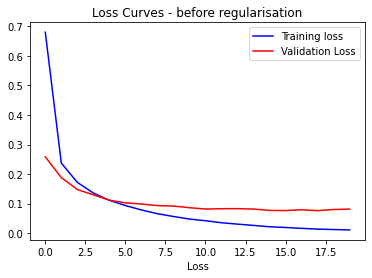

In [ ]:
#Check for Overfitting

plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.title('Loss Curves - before regularisation')

In [ ]:
from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation='softmax'))

reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy,
                  metrics=['accuracy'])

reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val),
                             epochs=20, batch_size=1000)
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.9671 - acc: 0.6922 - val_loss: 0.2915 - val_acc: 0.9144
Epoch 2/20
 1000/50000 [..............................] - ETA: 1s - loss: 0.4687 - acc: 0.8660

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


50000/50000 [==============================] - 1s 26us/sample - loss: 0.3654 - acc: 0.8918 - val_loss: 0.1963 - val_acc: 0.9423
Epoch 3/20
50000/50000 [==============================] - 1s 26us/sample - loss: 0.2730 - acc: 0.9194 - val_loss: 0.1569 - val_acc: 0.9539
Epoch 4/20
50000/50000 [==============================] - 1s 26us/sample - loss: 0.2279 - acc: 0.9333 - val_loss: 0.1362 - val_acc: 0.9601
Epoch 5/20
50000/50000 [==============================] - 1s 26us/sample - loss: 0.1925 - acc: 0.9425 - val_loss: 0.1194 - val_acc: 0.9656
Epoch 6/20
50000/50000 [==============================] - 1s 26us/sample - loss: 0.1727 - acc: 0.9489 - val_loss: 0.1108 - val_acc: 0.9676
Epoch 7/20
50000/50000 [==============================] - 1s 25us/sample - loss: 0.1507 - acc: 0.9546 - val_loss: 0.1029 - val_acc: 0.9699
Epoch 8/20
50000/50000 [==============================] - 1s 27us/sample - loss: 0.1409 - acc: 0.9584 - val_loss: 0.0945 - val_acc: 0.9716
Epoch 9/20
50000/50000 [==============

In [ ]:
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Test loss: 0.06935228507170686
Test accuracy: 0.9790999889373779


Text(0.5, 1.0, 'Loss Curves - after regularization')

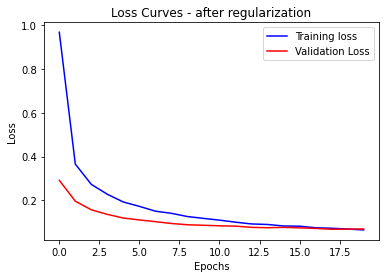

In [ ]:
plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after regularization')

## Making Predictions

This was added just for more calrity and understanding. Let's use our model to predict some images and labels

In [ ]:
predictions  = model.predict([test_images])  #Make prediction
print(np.argmax(predictions[1000])) #Print out 9

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


9


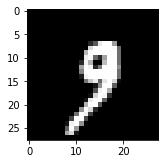

In [ ]:
# Let's see whether the image would turn out to be 9
#Remember that the input data to the network were flattened for the purpose of learning to a vector with a length of 784. Before displaying it, we need to convert it back to the size of 28 x 28 pixels.
plt.figure(figsize=(8,5))

plt.subplot(1,3,1)
plt.imshow(test_images[1000].reshape(28,28), cmap="gray") # Import the image
plt.show() #Show the image

In [ ]:
#You can aswell try out others and play around with them
predictions = model.predict([test_images]) #Make prediction
print(np.argmax(predictions[6703])) # Print out the number

2


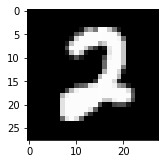

In [ ]:
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[6703].reshape(28,28), cmap="gray") # Import the image
plt.show()  # Show the image